###### Notation

| General Notation | Description | Python (if any) |
|:-----------------|:------------|:-----------------|
| $r(i,j)$         | Scalar; Equals 1 if user j rated movie i, 0 otherwise | |
| $y(i,j)$         | Scalar; Rating given by user j on movie i (if $r(i,j) = 1$ is defined) | |
| $\mathbf{w}^{(j)}$ | Vector; Parameters for user j | |
| $b^{(j)}$        | Scalar; Parameter for user j | |
| $\mathbf{x}^{(i)}$ | Vector; Feature ratings for movie i | |
| $n_u$            | Number of users | `num_users` |
| $n_m$            | Number of movies | `num_movies` |
| $n$              | Number of features | `num_features` |
| $\mathbf{X}$     | Matrix of vectors $\mathbf{x}^{(i)}$ | `X` |
| $\mathbf{W}$     | Matrix of vectors $\mathbf{w}^{(j)}$ | `W` |
| $\mathbf{b}$     | Vector of bias parameters $b^{(j)}$ | `b` |
| $\mathbf{R}$     | Matrix of elements $r(i,j)$ | `R` |


# <img align="left" src="./images/movie_camera.png"     style=" width:40px;  " > Collaborative Filtering Recommender Systems

Below, we need to load the movie dataset into the variables $Y$ and $R$.

The matrix $Y$ (a  $n_m \times n_u$ matrix) stores the ratings $y^{(i,j)}$. The matrix $R$ is an binary-valued indicator matrix, where $R(i,j) = 1$ if user $j$ gave a rating to movie $i$, and $R(i,j)=0$ otherwise. 

We will also be working with the
matrices, $\mathbf{X}$, $\mathbf{W}$ and $\mathbf{b}$: 

$$\mathbf{X} = 
\begin{bmatrix}
--- (\mathbf{x}^{(0)})^T --- \\
--- (\mathbf{x}^{(1)})^T --- \\
\vdots \\
--- (\mathbf{x}^{(n_m-1)})^T --- \\
\end{bmatrix} , \quad
\mathbf{W} = 
\begin{bmatrix}
--- (\mathbf{w}^{(0)})^T --- \\
--- (\mathbf{w}^{(1)})^T --- \\
\vdots \\
--- (\mathbf{w}^{(n_u-1)})^T --- \\
\end{bmatrix},\quad
\mathbf{ b} = 
\begin{bmatrix}
 b^{(0)}  \\
 b^{(1)} \\
\vdots \\
b^{(n_u-1)} \\
\end{bmatrix}\quad
$$ 

The $i$-th row of $\mathbf{X}$ corresponds to the
feature vector $x^{(i)}$ for the $i$-th movie, and the $j$-th row of
$\mathbf{W}$ corresponds to one parameter vector $\mathbf{w}^{(j)}$, for the
$j$-th user. Both $x^{(i)}$ and $\mathbf{w}^{(j)}$ are $n$-dimensional
vectors. For the purposes of this exercise, you will use $n=10$, and
therefore, $\mathbf{x}^{(i)}$ and $\mathbf{w}^{(j)}$ have 10 elements.
Correspondingly, $\mathbf{X}$ is a
$n_m \times 10$ matrix and $\mathbf{W}$ is a $n_u \times 10$ matrix.

We will start by loading the movie ratings dataset to understand the structure of the data.
We will load $Y$ and $R$ with the movie dataset.  

##  Packages <img align="left" src="./images/python-logo.png"     style=" width:40px;   " > 



In [1]:
import pandas as pd
import numpy as np
from numpy import loadtxt
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings

# Ignore all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Below cell is optional to extract the dataset archive

In [4]:
# !7z x "D:/machine-learning-specialization/movie_recomender_system/data/ml-latest-small.zip"


Load data from csv

In [3]:
data_path = './data/ml-latest-small/'
links = pd.read_csv(data_path+'links.csv')
movies = pd.read_csv(data_path+'movies.csv')
ratings = pd.read_csv(data_path+'ratings.csv')
tags = pd.read_csv(data_path+'tags.csv')

                   

**Lets have a view/ exploratory analysis on the DataFrame**

In [5]:
# Optional----> to use these style simply change tablefmt= value with this list-name and one of index no you prefer to get a better view 
table_format=[
    "plain",           # 0
    "simple",          # 1
    "github",          # 2
    "grid",            # 3
    "simple_grid",     # 4
    "rounded_grid",    # 5
    "heavy_grid",      # 6
    "mixed_grid",      # 7
    "double_grid",     # 8
    "fancy_grid",      # 9
    "outline",         # 10
    "simple_outline",  # 11
    "rounded_outline", # 12
    "heavy_outline",   # 13
    "mixed_outline",   # 14
    "double_outline",  # 15
    "fancy_outline",   # 16
    "pipe",            # 17
    "orgtbl",          # 18
    "jira",            # 19
    "presto",          # 20
    "pretty",]         # 21     

*Overview of DataFrames:*

In [5]:
print("Tags DataFrame:")
print(tabulate(tags.head(), headers='keys', tablefmt='rounded_grid'))

print("\nRatings DataFrame:")
print(tabulate(ratings.head(), headers='keys', tablefmt='rounded_grid'))

print("\nMovies DataFrame:")
print(tabulate(movies.head(), headers='keys', tablefmt='rounded_grid'))

print("\nLinks DataFrame:")
print(tabulate(links.head(), headers='keys', tablefmt='rounded_grid'))


Tags DataFrame:
╭────┬──────────┬───────────┬─────────────────┬─────────────╮
│    │   userId │   movieId │ tag             │   timestamp │
├────┼──────────┼───────────┼─────────────────┼─────────────┤
│  0 │        2 │     60756 │ funny           │  1445714994 │
├────┼──────────┼───────────┼─────────────────┼─────────────┤
│  1 │        2 │     60756 │ Highly quotable │  1445714996 │
├────┼──────────┼───────────┼─────────────────┼─────────────┤
│  2 │        2 │     60756 │ will ferrell    │  1445714992 │
├────┼──────────┼───────────┼─────────────────┼─────────────┤
│  3 │        2 │     89774 │ Boxing story    │  1445715207 │
├────┼──────────┼───────────┼─────────────────┼─────────────┤
│  4 │        2 │     89774 │ MMA             │  1445715200 │
╰────┴──────────┴───────────┴─────────────────┴─────────────╯

Ratings DataFrame:
╭────┬──────────┬───────────┬──────────┬─────────────╮
│    │   userId │   movieId │   rating │   timestamp │
├────┼──────────┼───────────┼──────────┼────────

**For Collaborative filtering algorithm we don't need the  `links` .**

So we will be droping it

In [6]:
del links

*Concise Summary*

In [7]:
print("Concise Summary of Tags DataFrame:\n")
print(tags.info())

print("\n\nConcise Summary of Ratings DataFrame:\n")
print(ratings.info())

print("\n\nConcise Summary of Movies DataFrame:\n")
print(movies.info())

Concise Summary of Tags DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
None


Concise Summary of Ratings DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


Concise Summary of Movies DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
D

*Summary Statistics:*

In [8]:
print("Summary Statistics for Tags DataFrame:")
print(tabulate(tags.describe(), headers='keys', tablefmt='fancy_grid'))

print("\nSummary Statistics for Ratings DataFrame:")
print(tabulate(ratings.describe(), headers='keys', tablefmt='fancy_grid'))

print("\nSummary Statistics for Movies DataFrame:")
print(tabulate(movies.describe(), headers='keys', tablefmt='fancy_grid'))

Summary Statistics for Tags DataFrame:
╒═══════╤══════════╤═══════════╤════════════════╕
│       │   userId │   movieId │      timestamp │
╞═══════╪══════════╪═══════════╪════════════════╡
│ count │ 3683     │    3683   │ 3683           │
├───────┼──────────┼───────────┼────────────────┤
│ mean  │  431.149 │   27252   │    1.32003e+09 │
├───────┼──────────┼───────────┼────────────────┤
│ std   │  158.473 │   43490.6 │    1.72102e+08 │
├───────┼──────────┼───────────┼────────────────┤
│ min   │    2     │       1   │    1.13718e+09 │
├───────┼──────────┼───────────┼────────────────┤
│ 25%   │  424     │    1262.5 │    1.13752e+09 │
├───────┼──────────┼───────────┼────────────────┤
│ 50%   │  474     │    4454   │    1.26983e+09 │
├───────┼──────────┼───────────┼────────────────┤
│ 75%   │  477     │   39263   │    1.49846e+09 │
├───────┼──────────┼───────────┼────────────────┤
│ max   │  610     │  193565   │    1.5371e+09  │
╘═══════╧══════════╧═══════════╧════════════════╛

Summary St

*Check for missing values in each DataFrame.*

In [9]:
print("Missing Values in Tags DataFrame:")
print(tags.isnull().sum())

print("\nMissing Values in Ratings DataFrame:")
print(ratings.isnull().sum())

print("\nMissing Values in Movies DataFrame:")
print(movies.isnull().sum())


Missing Values in Tags DataFrame:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

Missing Values in Ratings DataFrame:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing Values in Movies DataFrame:
movieId    0
title      0
genres     0
dtype: int64


As it's a cleaned dataset, that's why there are no null value which is good.

In [11]:
# Optional--> To check how many plotting style available

styles = plt.style.available
print(f"Total number of available plotting styles: {len(styles)}")
print(f"\n{styles}")


Total number of available plotting styles: 28

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### Data Visualization:

*Count plot of movie genres*

In [12]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Extract all genres information by creating a DataFrame with `explode()` method

In [13]:
# Split the genres column into a list of genres
df_genres = movies
df_genres['genres'] = df_genres['genres'].str.split('|')

df_genres = df_genres.explode('genres')
df_genres.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy


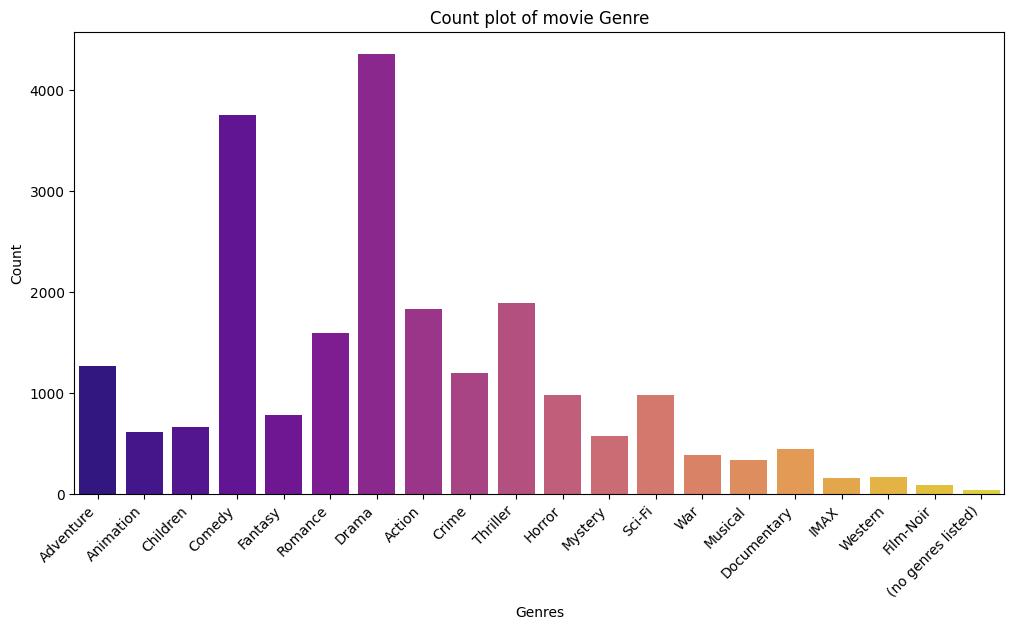

In [14]:
# Create count plot
plt.figure(figsize=(12,6))
sns.countplot(x='genres', data=df_genres, palette='plasma', hue='genres' )

# Add labels to the plot
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Count plot of movie Genre')

# Rotate X-Axis labels for readability
plt.xticks(rotation=45, ha='right')
plt.show()

*Histogram of Ratings*

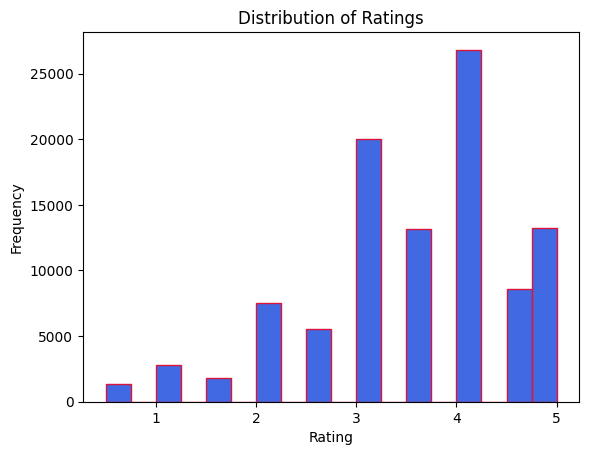

In [15]:
plt.hist(ratings['rating'], bins='sturges',color='royalblue', edgecolor='crimson')

plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.show()

*BoxPlot*

Distribution of ratings for each movie genre

In [16]:
merged_data = pd.merge(df_genres,ratings, on='movieId')
merged_data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure,1,4.0,964982703
1,1,Toy Story (1995),Adventure,5,4.0,847434962
2,1,Toy Story (1995),Adventure,7,4.5,1106635946
3,1,Toy Story (1995),Adventure,15,2.5,1510577970
4,1,Toy Story (1995),Adventure,17,4.5,1305696483


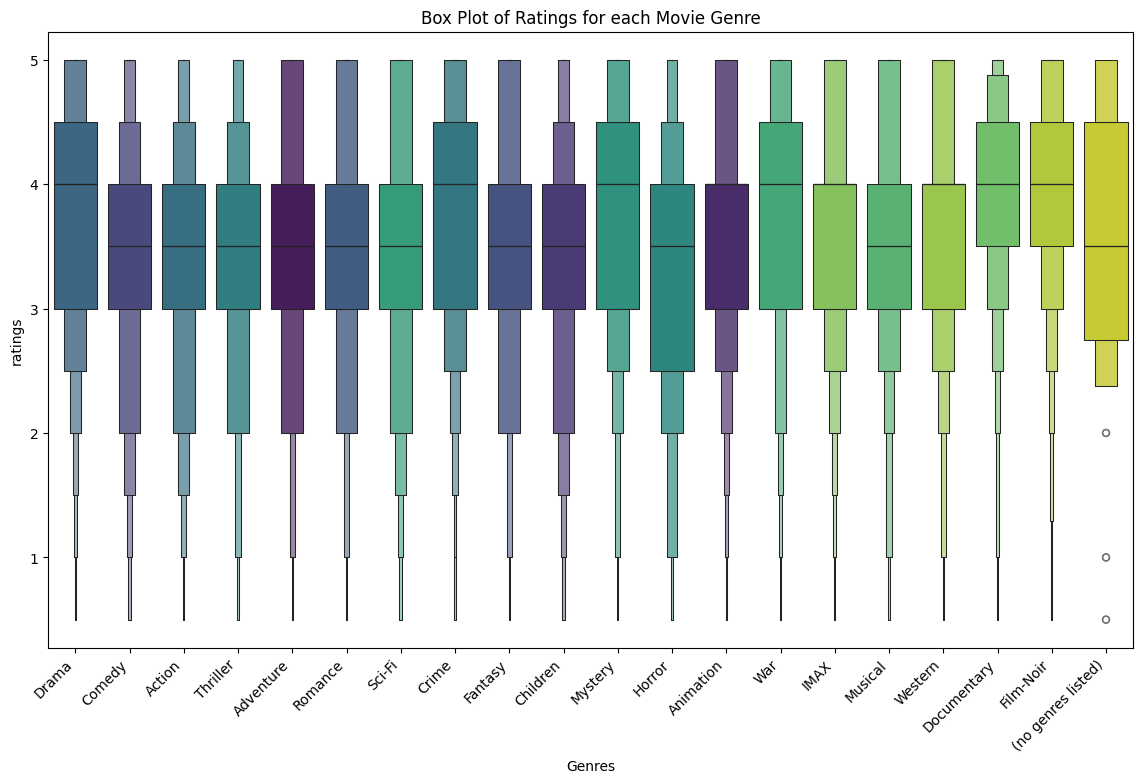

In [17]:
plt.figure(figsize=(14,8))
sns.boxenplot(x='genres', y='rating', data=merged_data,palette='viridis',hue='genres', order=merged_data['genres'].value_counts().index)

plt.title('Box Plot of Ratings for each Movie Genre')
plt.xlabel('Genres')
plt.ylabel('ratings')
plt.xticks(rotation=45, ha='right')

plt.show()

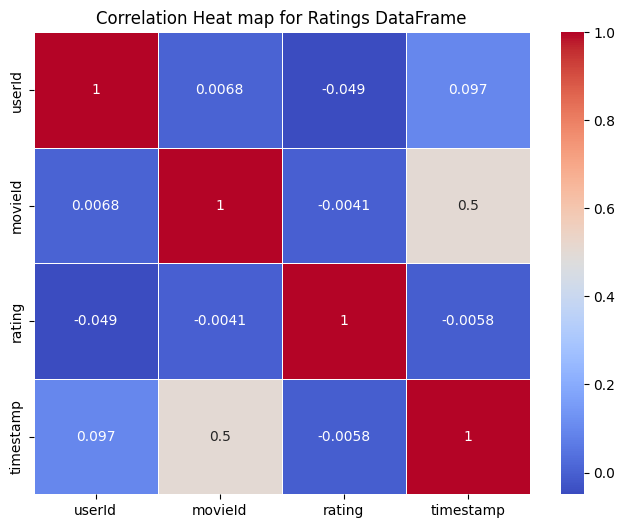

In [18]:
plt.figure(figsize=(8,6))

sns.heatmap(ratings.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heat map for Ratings DataFrame')
plt.show()

## **Let's Do some Data Engineering to load and preprocess the data set** <img align="left" src="./images/data-engineering.png"     style=" width:40px;  " >

#### Create a Dataframe for movie list and their ratings

In [4]:
print("Unique movieId values in ratings:", ratings['movieId'].nunique())
print("Unique movieId values in movies:", movies['movieId'].nunique())


Unique movieId values in ratings: 9724
Unique movieId values in movies: 9742


In [5]:
missing_movie_ids = set(movies['movieId']) - set(ratings['movieId'])
print("Movie IDs in movies dataframe without ratings:", missing_movie_ids)


Movie IDs in movies dataframe without ratings: {3456, 6849, 4194, 85565, 32160, 26085, 3338, 6668, 7020, 30892, 7792, 34482, 32371, 1076, 5721, 2939, 8765, 25855}


In [6]:

print(f"Total {len(missing_movie_ids)} movies has no rating from the ratings Dataframe ")
for i in sorted(missing_movie_ids):
    movie_name = movies.loc[movies['movieId'] == i, 'title'].values
    print(f"MovieId {i}: {movie_name}")

Total 18 movies has no rating from the ratings Dataframe 
MovieId 1076: ['Innocents, The (1961)']
MovieId 2939: ['Niagara (1953)']
MovieId 3338: ['For All Mankind (1989)']
MovieId 3456: ['Color of Paradise, The (Rang-e khoda) (1999)']
MovieId 4194: ["I Know Where I'm Going! (1945)"]
MovieId 5721: ['Chosen, The (1981)']
MovieId 6668: ['Road Home, The (Wo de fu qin mu qin) (1999)']
MovieId 6849: ['Scrooge (1970)']
MovieId 7020: ['Proof (1991)']
MovieId 7792: ['Parallax View, The (1974)']
MovieId 8765: ['This Gun for Hire (1942)']
MovieId 25855: ['Roaring Twenties, The (1939)']
MovieId 26085: ['Mutiny on the Bounty (1962)']
MovieId 30892: ['In the Realms of the Unreal (2004)']
MovieId 32160: ['Twentieth Century (1934)']
MovieId 32371: ['Call Northside 777 (1948)']
MovieId 34482: ['Browning Version, The (1951)']
MovieId 85565: ['Chalet Girl (2011)']


Lets drop these missing movies in ratings dataframe as these are no longer use for collaborative filtering algorithm

In [7]:
movie_id_to_drop = list(missing_movie_ids)

filtered_movies =pd.DataFrame(movies.loc[~movies['movieId'].isin(movie_id_to_drop)])
filtered_movies.shape

(9724, 3)

In [8]:
# Calculate mean rating and number of ratings per movie
movie_stats = ratings.groupby('movieId')['rating'].agg(['mean', 'count']).reset_index()

# Merge with movie DataFrame to get the titles
movie_list_df = pd.merge(movie_stats, filtered_movies[['movieId', 'title']], on='movieId')
# movie_list = movie_list.rename(columns={'mean':'mean_rating', 'count': 'number_of_ratings'})
movieList = movie_list_df['title'].to_list()
print(f"Total number of movies:{len(movieList)}")
print(f"Shape of MovieList DataFrame:{movie_list_df.shape}")

# Save the Dataframe for future use
file_path = './data/processed/'
file_name = 'movie_list_df.csv'
movie_list_df.to_csv((file_path+file_name))

Total number of movies:9724
Shape of MovieList DataFrame:(9724, 4)


### Create a rating matrix R

#### Merge the DataFrames to get a unified view

In [9]:
movie_data = pd.merge(ratings, filtered_movies, on='movieId')
print("After merging ratings and movies:", movie_data.shape)

movie_data = pd.merge(movie_data, tags, on=['userId', 'movieId'], how='left')
print("After merging tags:", movie_data.shape)


After merging ratings and movies: (100836, 6)
After merging tags: (102677, 8)


### Create a rating matrix R

The matrix $R$ is an binary-valued indicator matrix, where $R(i,j) = 1$ if user $j$ gave a rating to movie $i$, and $R(i,j)=0$ otherwise. 

In [10]:
R = pd.pivot_table(movie_data, values='rating', index='movieId', columns='userId', fill_value=0)
R = R.applymap(lambda x: 1 if x > 0 else 0)
R.shape
# R.head()

(9724, 610)

In [19]:
R.head(10)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,1,0,1,0,0,0,...,1,0,1,1,1,1,1,1,1,1
2,0,0,0,0,0,1,0,1,0,0,...,0,1,0,1,1,0,0,1,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,1,0,0,0,0,1,0,0,0,0,...,0,1,1,1,0,0,0,0,0,1
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Create feature matrix X (using genres as features)



$$\[
\mathbf{X} = 
\begin{bmatrix}
--- (\mathbf{x}^{(0)})^T --- \\
--- (\mathbf{x}^{(1)})^T --- v\
\vdots \\
--- (\mathbf{x}^{(n_m-1)})^T --- \\
\end{bmatrix} , \$$quad
\]
quad
\]


The $i$-th row of $\mathbf{X}$ corresponds to the
feature vector $x^{(i)}$ for the $i$-th movie \quad

In [11]:
filtered_movies['genres'] = filtered_movies['genres'].apply(lambda x: '|'.join(sorted(map(str, x))))

# Now use get_dummies
genres = filtered_movies['genres'].str.get_dummies(sep='|')

# Check the unique genres and number of unique genres
unique_genres = genres.columns
num_unique_genres = len(unique_genres)
print("Unique Genres:", unique_genres)
print("Number of Unique Genres:", num_unique_genres)

Unique Genres: Index([' ', '(', ')', '-', 'A', 'C', 'D', 'F', 'H', 'I', 'M', 'N', 'R', 'S',
       'T', 'W', 'X', 'a', 'c', 'd', 'e', 'g', 'h', 'i', 'l', 'm', 'n', 'o',
       'r', 's', 't', 'u', 'v', 'y'],
      dtype='object')
Number of Unique Genres: 34


In [12]:
X = genres.values
# for i in range(10):
#     print(X[i])
X.shape

(9724, 34)

In [13]:
Y = pd.pivot_table(ratings, values='rating', index='movieId', columns='userId', fill_value=0,)
Y.shape

(9724, 610)

### Save X, Y, R for faster Load or future use

In [17]:
# Save the Dataframe for future use
file_path = './data/processed/'
file_name = 'small_movie_R.csv'
R.to_csv(file_path+file_name, header=False, index=False)


In [23]:
# file = open('./data/processed/small_movie_R.csv', 'rb')
# dfss = loadtxt(file, delimiter=",")
# dfss.shape

(9724, 610)

In [26]:
file_name = 'small_movie_X.csv'

np.savetxt(file_path+file_name, X, delimiter=",")

In [27]:
# file = open('./data/processed/small_movie_X.csv', 'rb')
# dfx = loadtxt(file, delimiter=",")
# dfx.shape

(9724, 34)

In [28]:
file_name = 'small_movie_Y.csv'
Y.to_csv(file_path+file_name, header=False, index=False)

In [29]:
# file = open('./data/processed/small_movie_Y.csv', 'rb')
# dfz = loadtxt(file, delimiter=",")
# dfz.shape

(9724, 610)

#### Function to load all csv in X,Y,R, movie list

In [31]:
def load_processed_data():
    file = open('./data/processed/small_movie_X.csv', 'rb')
    X = loadtxt(file, delimiter=",")
    file = open('./data/processed/small_movie_Y.csv', 'rb')
    Y = loadtxt(file, delimiter=",")
    file = open('./data/processed/small_movie_R.csv', 'rb')
    R = loadtxt(file, delimiter=",")
    return(X, Y, R)


In [32]:
X, Y, R = load_processed_data()
print("Y", Y.shape, "R", R.shape)
print("X", X.shape)

Y (9724, 610) R (9724, 610)
X (9724, 34)
